# Example 102 "Zweibock"

This model contains two trusses and three nodes. The left and right end nodes are fixed, whereas on the top middle node a reference force is applied in negative z-direction. The model may be generated with the following code and is shown in the undeformed state.

[![MyBinder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/adtzlr/trusspy/main?labpath=docs%2Fexamples%2Fe102%2Fe102.ipynb)
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adtzlr/trusspy/blob/main/docs/examples/e102/e102.ipynb)

In [ ]:
!pip install trusspy

In [ ]:
import trusspy as tp

M = tp.Model(logfile=False)

with M.Nodes as MN:
    MN.add_node(1, coord=(0, 0, 0))
    MN.add_node(2, coord=(1, 0, 1))
    MN.add_node(3, coord=(2, 0, 0))

with M.Elements as ME:
    ME.add_element(1, conn=(1, 2), gprop=[1])
    ME.add_element(2, conn=(2, 3), gprop=[1])

    E = 1  # elastic modulus
    ME.assign_material("all", [E])

with M.Boundaries as MB:
    MB.add_bound_U(1, (0, 0, 0))
    MB.add_bound_U(2, (0, 0, 1))
    MB.add_bound_U(3, (0, 0, 0))

with M.ExtForces as MF:
    MF.add_force(2, (0, 0, -1))

M.Settings.incs = 100
M.Settings.xlimit = (2, 0.5)
M.Settings.dlpf
M.Settings.stepcontrol = True
M.Settings.maxfac = 4

The calculation of the deformation process is started by calling the `build()` and `run()` methods.


# Model Summary
Analysis Dimension      "ndim": 3
Number of Nodes       "nnodes": 3
Number of Elements    "nelems": 2
 
System DOF              "ndof": 9
active DOF             "ndof1": 1
locked DOF             "ndof2": 8
 
active DOF          "nproDOF1": [5]
fixed  DOF          "nproDOF0": [0 1 2 3 4 6 7 8]


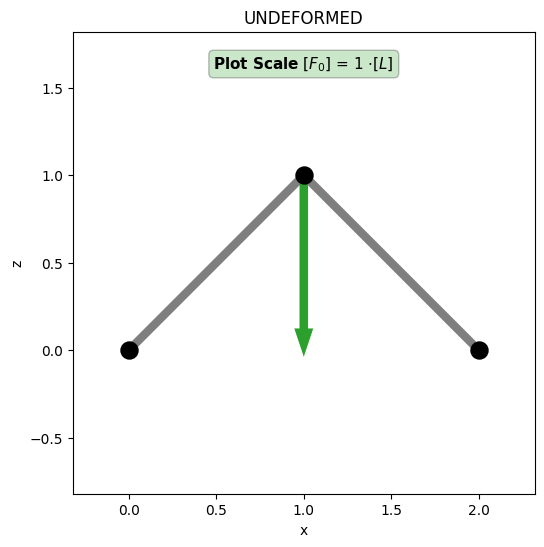

In [16]:
M.build()
fig, ax = M.plot_model(inc=0)

In [ ]:
M.run()

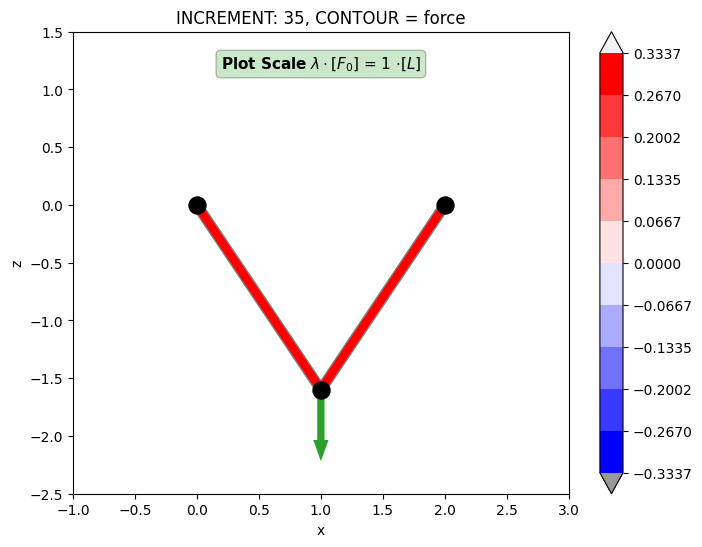

In [18]:
fig, ax = M.plot_model(
    view="xz",
    contour="force",
    lim_scale=(-1, 3, -2.5, 1.5),
)

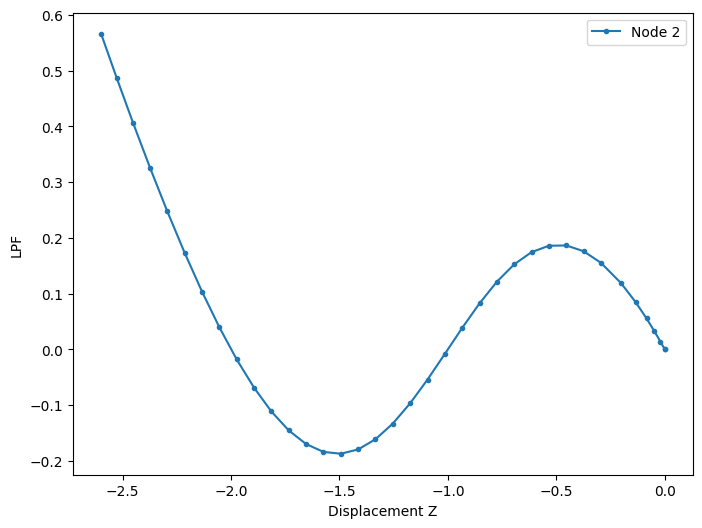

In [19]:
fig, ax = M.plot_history(nodes=[2, 2], X="Displacement Z", Y="LPF")

Let's re-run the model with a nonlinear material (plasticity with isotropic hardening). The isotropic yield-modulus `K` and the initial yield stress have to be specified. Additionally, the material has to be changed to `mtype=2`. Results are plotted for Node 2 as a History Plot of z-displacement vs. LPF.

In [ ]:
with M.Elements as ME:
    E = 1.0  # elastic modulus
    K = 0.1  # plastic modulus
    Sy = 0.1  # initial yield stress

    ME.assign_mtype("all", 2)
    ME.assign_material("all", [E, K, Sy])

M.build()
M.run()

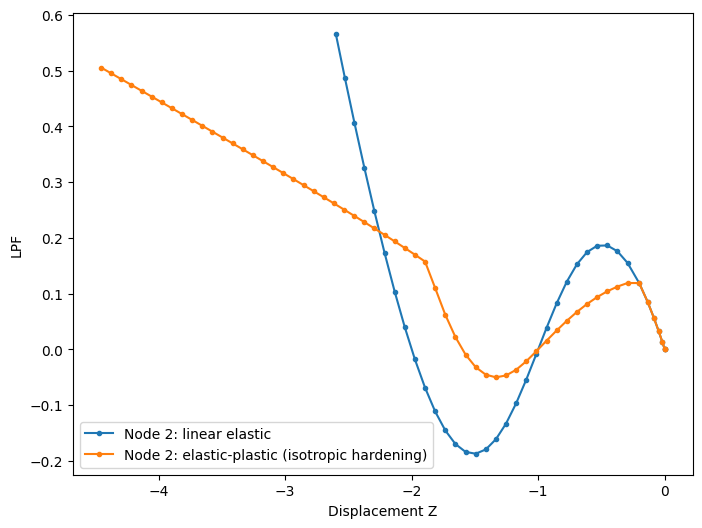

<Figure size 800x600 with 0 Axes>

In [21]:
fig, ax = M.plot_history(nodes=[2, 2], X="Displacement Z", Y="LPF", fig=fig, ax=ax)
ax.legend(
    [
        "Node 2: linear elastic",
        "Node 2: elastic-plastic (isotropic hardening)",
    ]
)
fig